In [1]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

In [13]:
def KNN_calcular(x, dataset, k=1, norma=2):
    dist = []
    x_train = dataset[:,0:2]
    y_train = dataset[:,2]
        
    for v in x_train:
        dist.append(np.linalg.norm(x-v,ord=norma))
    
    dist = np.array(dist)
    
    knn = [y_train[i] for i in dist.argsort()[:k]]
    
    clases, cant_clases = np.unique(knn, return_counts=True)
    
    #print('Listo')
    return(clases[np.argmax(cant_clases)])

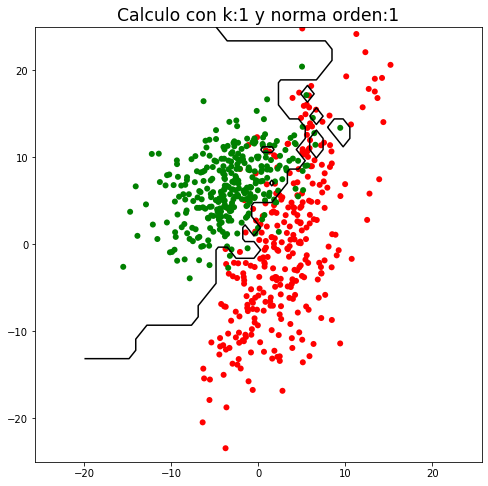

In [49]:
data = np.loadtxt("dataset.txt")

K = 1
orden_norma = 1

img = np.array(np.meshgrid(np.linspace(-20,20,40), np.linspace(-25,25,40)))
img = np.transpose(img, axes=[2,1,0])


z = [[KNN_calcular(x,data, k=K, norma=orden_norma) for x in y] for y in img]

pl.figure(figsize=(8, 8))
pl.axis()

pl.contour(img[:,:,0], img[:,:,1], z, [.5], colors=['#000000'])

color1 = ['r' if i==1 else 'g' for i in data[:,2]]

pl.scatter(data[:,0:2].T[0], data[:,0:2].T[1], c=color1, linewidths=0)
pl.title('Calculo con k:{} y norma orden:{}'.format(K,orden_norma),fontsize='xx-large')
pl.axis('equal');
